In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import csv
import time
from pandas import Grouper
from pandas import DataFrame
#from pandas.tools.plotting import lag_plot
#from pandas.tools.plotting import autocorrelation_plot
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import manifold
from scipy.stats import itemfreq
%pylab inline
from pylab import rcParams
rcParams['figure.figsize'] = 20,5

Populating the interactive namespace from numpy and matplotlib


C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


# Data Preparation

In [2]:
import data_preparation as dp
import datetime as dt

In [3]:
df = pd.read_csv('datatraining.txt', header=0)
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.250000,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.000000,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.500000,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.250000,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.500000,0.004757,1
...,...,...,...,...,...,...,...
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1


In [4]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
df = pd.read_csv('datatraining.csv', header=0, index_col='date', date_parser = dateparse )
df = df.drop(['Unnamed: 0'], axis = 1)
df.head()

C:\Users\ricky\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
date,,,,,,
2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


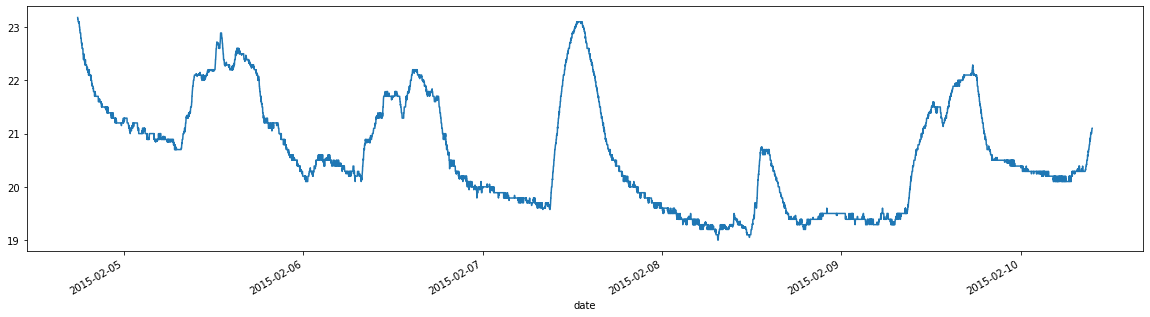

In [5]:
ts=df['Temperature']
ts.plot()

In [6]:
ts1= ts["2015-02-05":"2015-02-09"]
ts = ts1

In [7]:
groups = ts.groupby(pd.Grouper(freq='D'))
#groups.transform(lambda x: (x - x.mean()) / x.std())
groups.size()

date
2015-02-05    1440
2015-02-06    1440
2015-02-07    1440
2015-02-08    1440
2015-02-09    1440
Freq: D, Name: Temperature, dtype: int64

In [8]:
day = DataFrame()
daily_series = []
daily_list = []
for name, group in groups:
    norm_values = ((group.values - (group.values).mean()) / (group.values).std())
    
    # Padding performed to have series of same length -- important only for plotting the matrix
    pad_values = np.pad(norm_values,(0,1440-len(norm_values)),'constant')
    day["%s" %(name.day)] = pad_values
    daily_series.append(pd.Series(group))
    daily_list.append(list(group.values))

In [4]:
"""import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="Hours", y="Temperature", data=df)"""

NameError: name 'df' is not defined

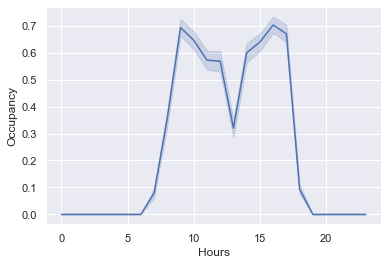

In [145]:
#sns.lineplot(x="Hours", y="Occupancy", data=df)

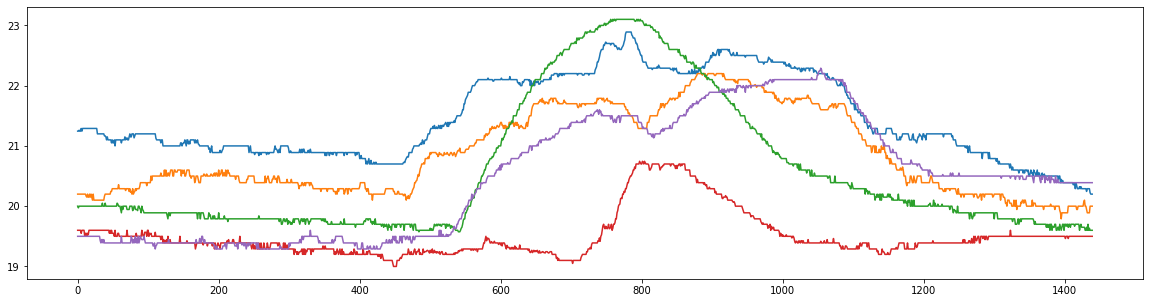

In [18]:
for i in range(len(daily_list)):
    plt.plot(daily_list[i])

### Transformation I: Offset Translation

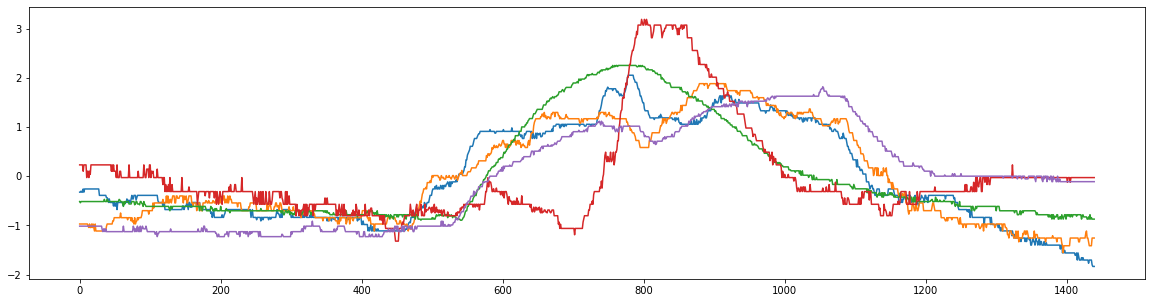

In [19]:
ts_offset = day - day.mean()
plot(ts_offset)

### Transformation II: Amplitude Scaling

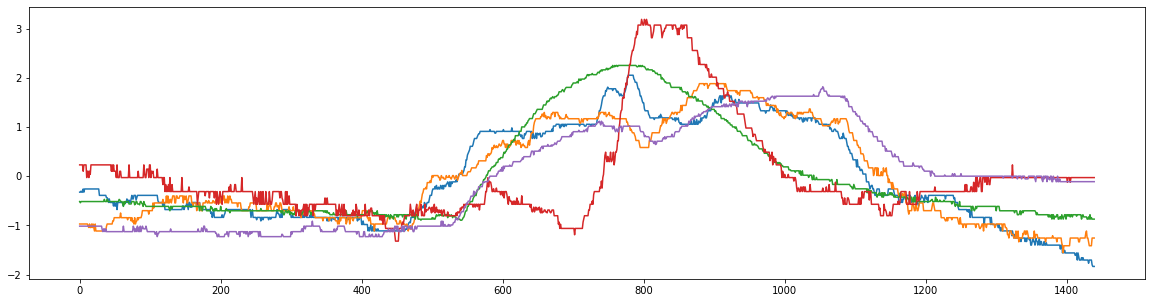

In [24]:
plt.plot((day - day.mean())/day.std()) #Amplitude scaling
plt.show()

### Transformation IV: Noise (smoothing)

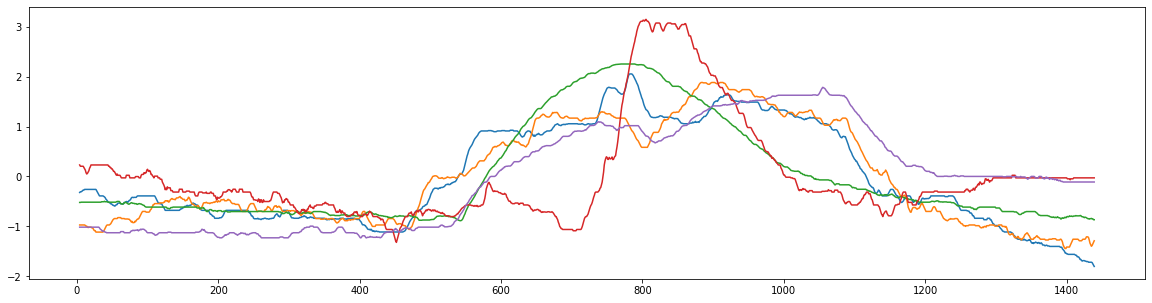

In [22]:
ts_smooth = ( (day - day.mean()) / day.std() ).rolling(window=5).mean()
plot(ts_smooth)

### Transformation III: Trend removal

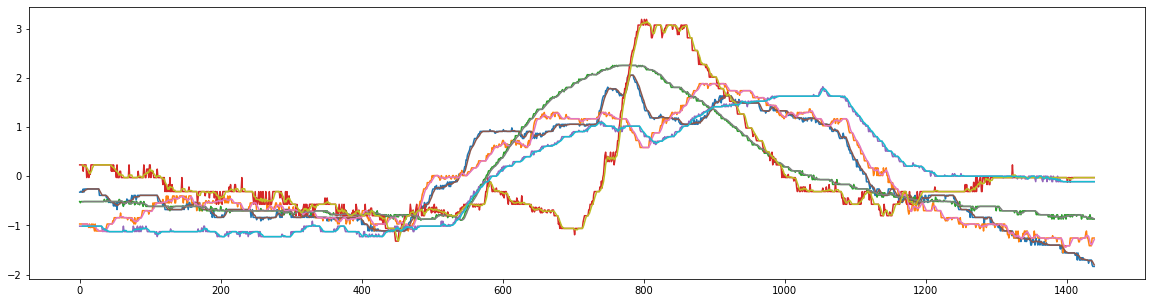

In [27]:
plt.plot(day)
plt.plot(day.rolling(window=5).mean())
plt.show()

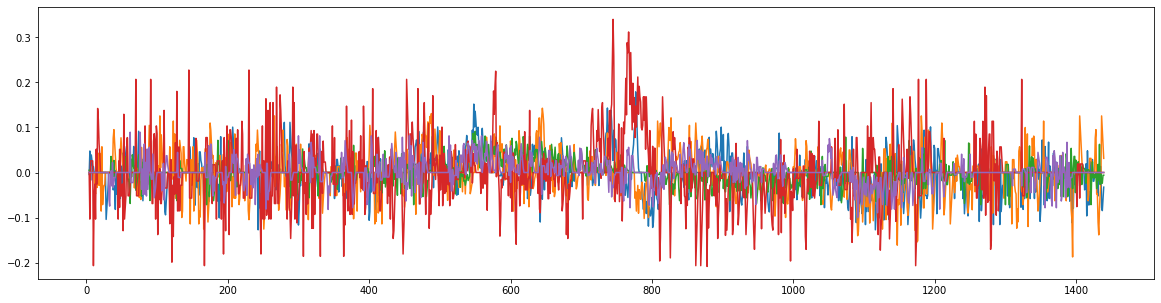

In [28]:
day_shift = day - day.rolling(window=5).mean()
plt.plot(day_shift)
plt.show()

date
2015-02-05    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-06    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-07    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-08    AxesSubplot(0.125,0.2;0.775x0.68)
2015-02-09    AxesSubplot(0.125,0.2;0.775x0.68)
Freq: D, Name: Temperature, dtype: object

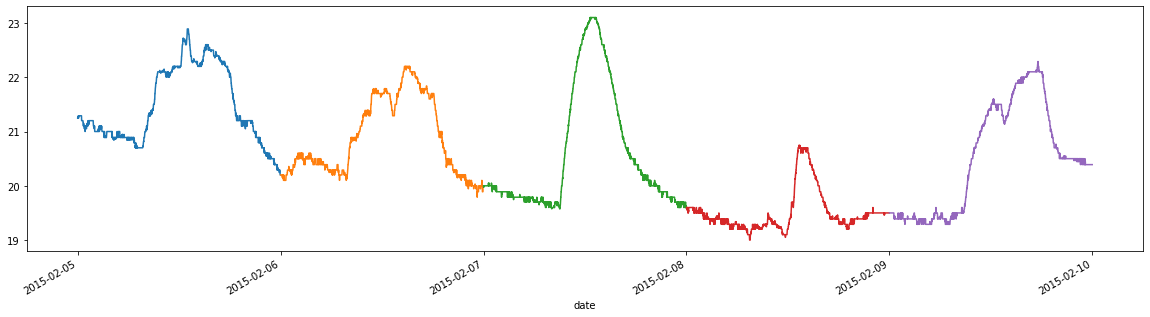

In [23]:
groups.plot()

# Euclidean Distance

In [29]:
from scipy.spatial.distance import euclidean

In [15]:
groups = ts.groupby(pd.Grouper(freq='D'))
#groups.transform(lambda x: (x - x.mean()) / x.std())
groups.size()

date
2015-02-05    1440
2015-02-06    1440
2015-02-07    1440
2015-02-08    1440
2015-02-09    1440
Freq: D, Name: Temperature, dtype: int64

In [30]:
dist = euclidean(day['5'], day['6'])
dist

12.435567870688478

In [31]:
dist = euclidean(day['5'][:10], day['6'][:10])
dist

2.137877566565979

# Manhattan Distance

In [32]:
from scipy.spatial.distance import cityblock

In [33]:
dist = cityblock(day['5'], day['6'])
dist

359.7303353072877

In [34]:
dist = cityblock(day['5'][:10], day['6'][:10])
dist

6.753571345256254

# Dynamic Time Warping

In [35]:
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

In [52]:
dist = dtw(day['5'], day['6'])
dist

6.272705188720539

In [51]:
dist = dtw(day['5'][:10], day['6'][:10])
dist

2.1378775665659795

In [38]:
path, dist = dtw_path(day['5'][:10], day['6'][:10])

In [39]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [43]:
path, dist = dtw_path(day['5'], day['6'])

In [44]:
path

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9),
 (10, 10),
 (11, 11),
 (12, 12),
 (13, 13),
 (14, 14),
 (15, 15),
 (16, 16),
 (17, 17),
 (18, 18),
 (19, 19),
 (20, 20),
 (21, 21),
 (22, 22),
 (23, 23),
 (24, 24),
 (25, 25),
 (26, 26),
 (27, 27),
 (28, 28),
 (29, 29),
 (30, 30),
 (31, 31),
 (32, 32),
 (33, 33),
 (34, 34),
 (35, 35),
 (36, 36),
 (37, 37),
 (38, 38),
 (39, 39),
 (40, 40),
 (41, 41),
 (42, 42),
 (43, 43),
 (44, 44),
 (45, 45),
 (46, 46),
 (47, 47),
 (48, 48),
 (49, 49),
 (50, 50),
 (51, 51),
 (52, 52),
 (53, 53),
 (53, 54),
 (53, 55),
 (53, 56),
 (53, 57),
 (53, 58),
 (53, 59),
 (53, 60),
 (53, 61),
 (53, 62),
 (53, 63),
 (53, 64),
 (53, 65),
 (53, 66),
 (53, 67),
 (53, 68),
 (53, 69),
 (53, 70),
 (53, 71),
 (53, 72),
 (53, 73),
 (53, 74),
 (53, 75),
 (53, 76),
 (53, 77),
 (53, 78),
 (53, 79),
 (53, 80),
 (53, 81),
 (53, 82),
 (53, 83),
 (53, 84),
 (53, 85),
 (53, 86),
 (53, 87),
 (53, 88),
 (53, 89),
 (53, 90),
 (53, 91),
 (53, 92

In [45]:
from scipy.spatial.distance import cdist

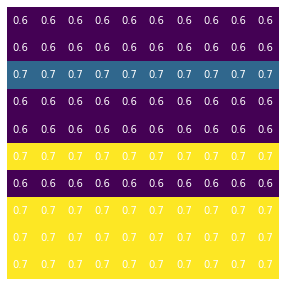

In [47]:
mat = cdist(day['5'].values[:10].reshape(-1,1), day['6'].values[:10].reshape(-1,1))

plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
for i in range(mat.shape[0]):
    for j in range(mat.shape[1]):
        text = plt.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")
        
plt.show()

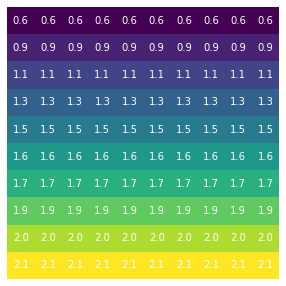

In [48]:
acc = subsequence_cost_matrix(day['5'].values[:10].reshape(-1,1), day['6'].values[:10].reshape(-1,1))

plt.imshow(acc)
plt.axis("off")
plt.autoscale(False)
for i in range(acc.shape[0]):
    for j in range(acc.shape[1]):
        text = plt.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")
        
plt.show()

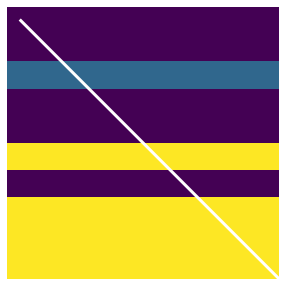

In [49]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [53]:
path, dist = dtw_path(day['5'], day['6'], global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
dist

12.022149892314692

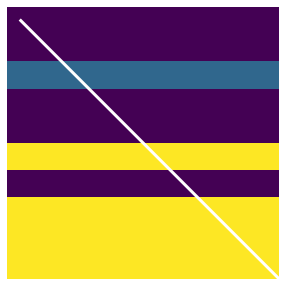

In [54]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [56]:
path, dist = dtw_path(day['5'], day['6'], global_constraint="itakura", itakura_max_slope=2.)
dist

6.445469611752126

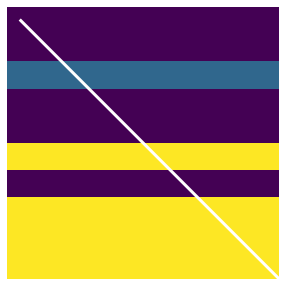

In [57]:
plt.imshow(mat)
plt.axis("off")
plt.autoscale(False)
plt.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
plt.show()

In [59]:
cdist_dtw([day['5'], day['6'], day['7']])

array([[0.        , 6.27270519, 7.6525118 ],
       [6.27270519, 0.        , 7.51482487],
       [7.6525118 , 7.51482487, 0.        ]])

### DTW2 

In [7]:
from pyts.metrics import dtw as dtw2

In [69]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel())

811.7788423510981

In [70]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute')

2511.6000000000004

In [71]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='square', method='fast')

811.7788423510981

In [72]:
dtw2(ts1[:10].ravel(), ts2[:10].ravel(), dist='absolute', method='fast')

2511.6000000000004

# Features Extraction

In [9]:
import numpy as np
import scipy.stats as stats

In [10]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        'med': np.median(values),
        '10p': np.percentile(values, 10),
        '25p': np.percentile(values, 25),
        '50p': np.percentile(values, 50),
        '75p': np.percentile(values, 75),
        '90p': np.percentile(values, 90),
        'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }

    return features

In [11]:
features = calculate_features(day)

In [12]:
features

{'avg': 5    9.837810e-17
 6   -3.037077e-15
 7    1.638350e-15
 8    1.361812e-14
 9    1.071076e-15
 dtype: float64,
 'std': 5    1.0
 6    1.0
 7    1.0
 8    1.0
 9    1.0
 dtype: float64,
 'var': 5    1.0
 6    1.0
 7    1.0
 8    1.0
 9    1.0
 dtype: float64,
 'med': -0.3117764601396662,
 '10p': -1.0706859928427004,
 '25p': -0.7825775391664843,
 '50p': -0.3117764601396662,
 '75p': 0.8758291899168884,
 '90p': 1.5193391865767116,
 'iqr': 1.6584067290833726,
 'cov': 5    9.837810e-17
 6   -3.037077e-15
 7    1.638350e-15
 8    1.361812e-14
 9    1.071076e-15
 dtype: float64,
 'skw': array([0.30172084, 0.41490852, 1.13959253, 1.92853137, 0.20674207]),
 'kur': array([-1.30922456, -1.34097513, -0.22844298,  2.95137989, -1.37447629])}

In [13]:
#from tsfresh.feature_extraction import extract_features
from tsfresh import extract_features

https://tsfresh.readthedocs.io/en/latest/index.html

In [15]:
day['id'] = [0] * len(day)

In [16]:
features = extract_features(timeseries_container=day, column_id='id')

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 5/5 [00:21<00:00,  4.31s/it]


In [17]:
features.to_dict()

{'5__abs_energy': {0: 1440.0},
 '5__absolute_sum_of_changes': {0: 34.76831736890637},
 '5__agg_autocorrelation__f_agg_"mean"__maxlag_40': {0: 0.9666764109695901},
 '5__agg_autocorrelation__f_agg_"median"__maxlag_40': {0: 0.9685810448578734},
 '5__agg_autocorrelation__f_agg_"var"__maxlag_40': {0: 0.00048024290332638415},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"': {0: -0.11305017362799452},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"': {0: 0.09673334909707987},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"': {0: 0.0023424801986082003},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"': {0: 0.002022618824536251},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"': {0: 0.022289787969906494},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"': {0: 0.0875131280482776},
 '5__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"': {0: 0.010904337258822939},
 '5__agg_linear_trend__f_

# Compression-based Distances

In [18]:
import zlib
import string

In [19]:
def CDM(x, y):
    return len(zlib.compress(x + y)) / (len(zlib.compress(x)) + len(zlib.compress(y)))

In [20]:
ts1_str = (' '.join([str(v) for v in day['5'][:10]])).encode('utf-8')
ts1_str

b'-0.32382590948831597 -0.32382590948831597 -0.30214539564364273 -0.32382590948831597 -0.32382590948831597 -0.2587843679543014 -0.32382590948831597 -0.2587843679543014 -0.2587843679543014 -0.2587843679543014'

In [21]:
ts2_str = (' '.join([str(v) for v in day['5'][:10]])).encode('utf-8')
ts2_str

b'-0.32382590948831597 -0.32382590948831597 -0.30214539564364273 -0.32382590948831597 -0.32382590948831597 -0.2587843679543014 -0.32382590948831597 -0.2587843679543014 -0.2587843679543014 -0.2587843679543014'

In [22]:
print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  410
len(compress(ts1_str+ts2_str)):  73
len(compress(ts1_str)):  66
len(compress(ts2_str)):  66
CDM =  0.553030303030303


In [24]:
ts1_str = (' '.join([str(v) for v in day['5']])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in day['6']])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  56367
len(compress(ts1_str+ts2_str)):  4503
len(compress(ts1_str)):  2247
len(compress(ts2_str)):  2214
CDM =  1.0094149293880297


# Time Series Approximation

In [29]:
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

In [32]:
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Rescale time series
ts = scaler.fit_transform(ts)
ts1 = scaler.fit_transform(day['5'])
ts2 = scaler.fit_transform(day['6'])

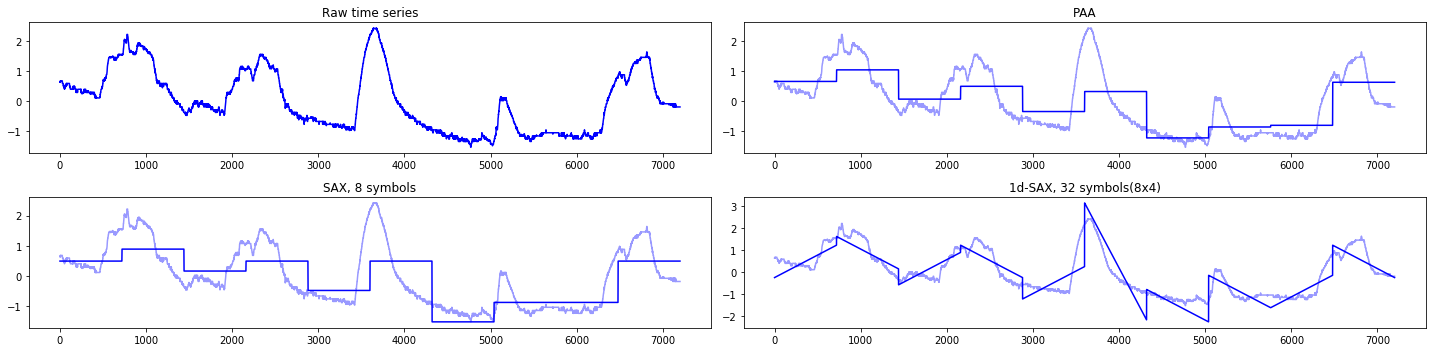

In [33]:
# PAA transform (and inverse transform) of the data
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
ts_paa = paa.fit_transform(ts)
paa_dataset_inv = paa.inverse_transform(ts_paa)

# SAX transform
n_sax_symbols = 8
sax = SymbolicAggregateApproximation(n_segments=n_paa_segments, alphabet_size_avg=n_sax_symbols)
ts_sax = sax.fit_transform(ts)
sax_dataset_inv = sax.inverse_transform(ts_sax)

# 1d-SAX transform
n_sax_symbols_avg = 8
n_sax_symbols_slope = 4
one_d_sax = OneD_SymbolicAggregateApproximation(
    n_segments=n_paa_segments,
    alphabet_size_avg=n_sax_symbols_avg,
    alphabet_size_slope=n_sax_symbols_slope)

ts_sax1d = one_d_sax.fit_transform(ts)
one_d_sax_dataset_inv = one_d_sax.inverse_transform(ts_sax1d)

plt.figure()
plt.subplot(2, 2, 1)  # First, raw time series
plt.plot(ts[0].ravel(), "b-")
plt.title("Raw time series")

plt.subplot(2, 2, 2)  # Second, PAA
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(paa_dataset_inv[0].ravel(), "b-")
plt.title("PAA")

plt.subplot(2, 2, 3)  # Then SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(sax_dataset_inv[0].ravel(), "b-")
plt.title("SAX, %d symbols" % n_sax_symbols)

plt.subplot(2, 2, 4)  # Finally, 1d-SAX
plt.plot(ts[0].ravel(), "b-", alpha=0.4)
plt.plot(one_d_sax_dataset_inv[0].ravel(), "b-")
plt.title("1d-SAX, %d symbols"
          "(%dx%d)" % (n_sax_symbols_avg * n_sax_symbols_slope,
                       n_sax_symbols_avg,
                       n_sax_symbols_slope))

plt.tight_layout()
plt.show()

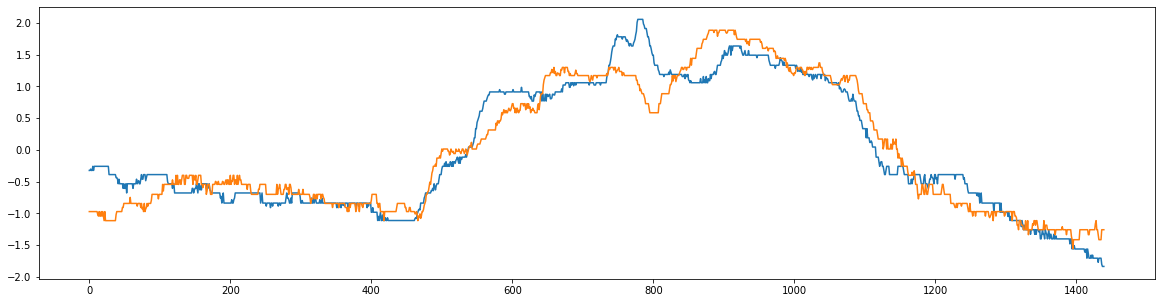

In [37]:
plt.plot(day['5'].ravel())
plt.plot(day['6'].ravel())
plt.show()

In [38]:
ts1_paa = paa.fit_transform(day['5'])
ts2_paa = paa.fit_transform(day['6'])

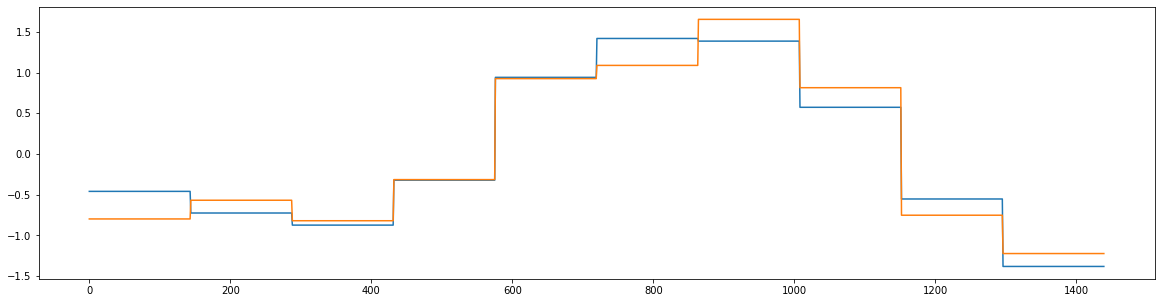

In [39]:
plt.plot(paa.inverse_transform(ts1_paa)[0].ravel())
plt.plot(paa.inverse_transform(ts2_paa)[0].ravel())
plt.show()

In [40]:
ts1_str = (' '.join([str(v) for v in ts1_paa[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_paa[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  389
len(compress(ts1_str+ts2_str)):  209
len(compress(ts1_str)):  117
len(compress(ts2_str)):  117
CDM =  0.8931623931623932


In [41]:
ts1_sax = sax.fit_transform(day['5'])
ts2_sax = sax.fit_transform(day['6'])

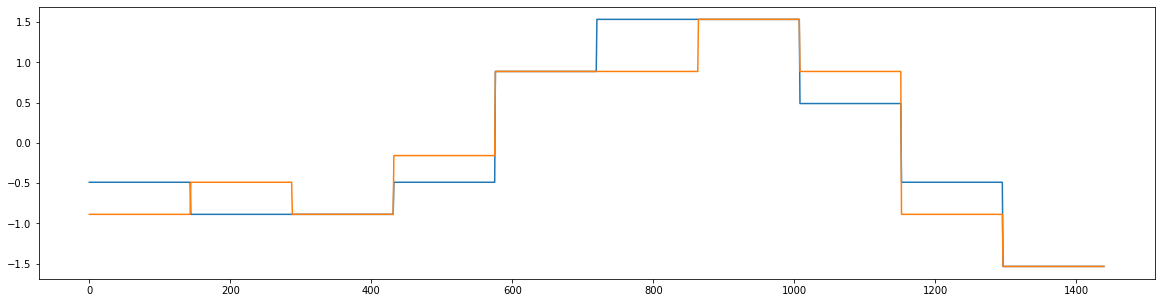

In [42]:
plt.plot(sax.inverse_transform(ts1_sax)[0].ravel())
plt.plot(sax.inverse_transform(ts2_sax)[0].ravel())
plt.show()

In [43]:
ts1_str = (' '.join([str(v) for v in ts1_sax[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  38
len(compress(ts1_str+ts2_str)):  35
len(compress(ts1_str)):  22
len(compress(ts2_str)):  24
CDM =  0.7608695652173914


In [44]:
ts1_sax1d = one_d_sax.fit_transform(day['5'])
ts2_sax1d = one_d_sax.fit_transform(day['6'])

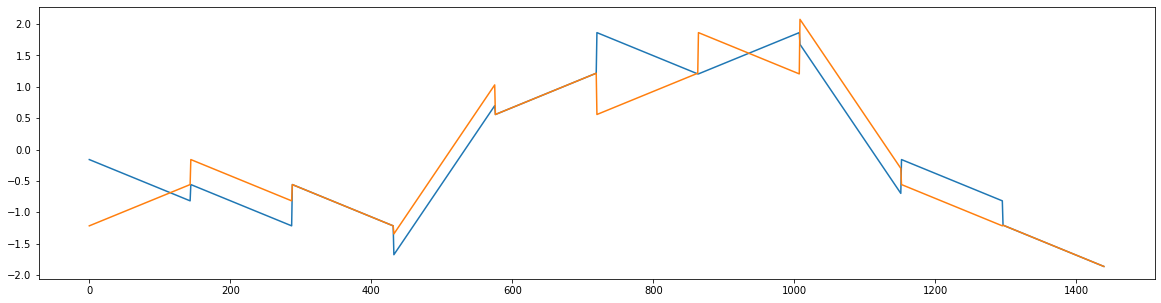

In [45]:
plt.plot(one_d_sax.inverse_transform(ts1_sax1d)[0].ravel())
plt.plot(one_d_sax.inverse_transform(ts2_sax1d)[0].ravel())
plt.show()

In [46]:
ts1_str = (' '.join([str(v) for v in ts1_sax1d[0].ravel()])).encode('utf-8')
ts2_str = (' '.join([str(v) for v in ts2_sax1d[0].ravel()])).encode('utf-8')

print("len(ts1_str + ts2_str): ", len(ts1_str + ts2_str))
print("len(compress(ts1_str+ts2_str)): ", len(zlib.compress(ts1_str+ts2_str)))
print("len(compress(ts1_str)): ", len(zlib.compress(ts1_str)))
print("len(compress(ts2_str)): ", len(zlib.compress(ts2_str)))
print("CDM = ", CDM(ts1_str, ts2_str))

len(ts1_str + ts2_str):  78
len(compress(ts1_str+ts2_str)):  47
len(compress(ts1_str)):  32
len(compress(ts2_str)):  31
CDM =  0.746031746031746


# Clustering

## Shape-based Clustering

In [47]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.generators import random_walks

C:\Users\ricky\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [156]:
km = TimeSeriesKMeans(n_clusters=2, metric="euclidean", max_iter=5, random_state=0)
km.fit(ts)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=2, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

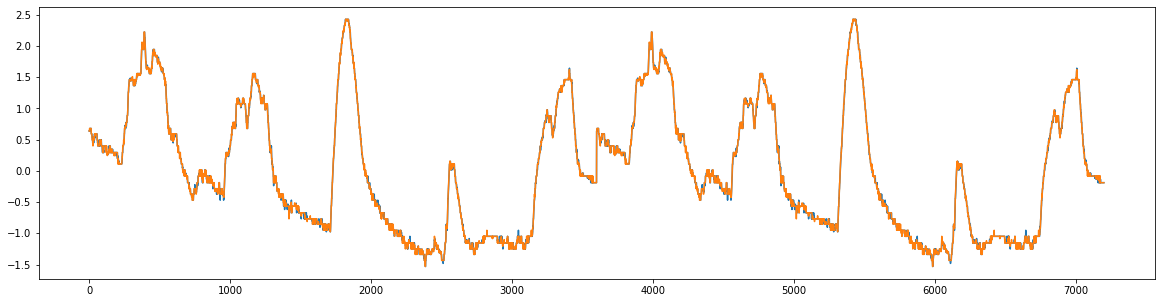

In [157]:
plt.plot(km.cluster_centers_.reshape(ts.shape[1], 2))
plt.show()

In [158]:
km.labels_

array([0], dtype=int64)

In [159]:
km.inertia_

inf

In [160]:
km_dtw = TimeSeriesKMeans(n_clusters=2, metric="dtw", max_iter=5, random_state=0)
km_dtw.fit(ts)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='dtw', metric_params=None,
                 n_clusters=2, n_init=1, n_jobs=None, random_state=0, tol=1e-06,
                 verbose=0)

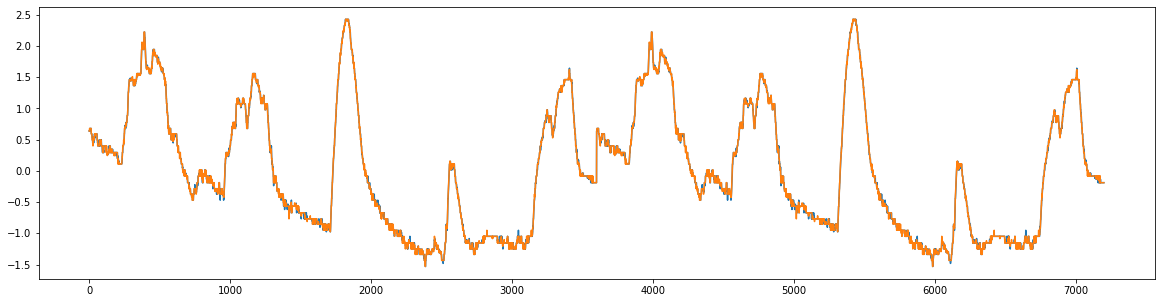

In [161]:
plt.plot(km_dtw.cluster_centers_.reshape(ts.shape[1], 2))
plt.show()

In [162]:
km_dtw.labels_

array([0], dtype=int64)

In [163]:
km_dtw.inertia_

inf

## Features-based Clustering

In [107]:
from sklearn.cluster import KMeans

In [164]:
F = [list(calculate_features(x).values())[:-2] for x in ts]

In [124]:
day_array = day.to_numpy()

In [123]:
type(ts)

numpy.ndarray

In [125]:
type(day_array)

numpy.ndarray

In [138]:
day_array.shape

(1440, 6)

In [166]:
kmeans = KMeans(n_clusters=1)
kmeans.fit(F)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [167]:
kmeans.inertia_

0.0

In [168]:
for i in range(3):
    plt.plot(np.mean(day[np.where(kmeans.labels_ == i)[0]], axis=0))
plt.show()

KeyError: "None of [Int64Index([0], dtype='int64')] are in the [columns]"

# Compression-based Clustering

In [114]:
from sklearn.metrics import pairwise_distances

In [134]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [135]:
M = pairwise_distances(day_array.reshape(day.shape[0], day_array.shape[1]), metric=cdm_dist)

In [136]:
M.shape

(1440, 1440)

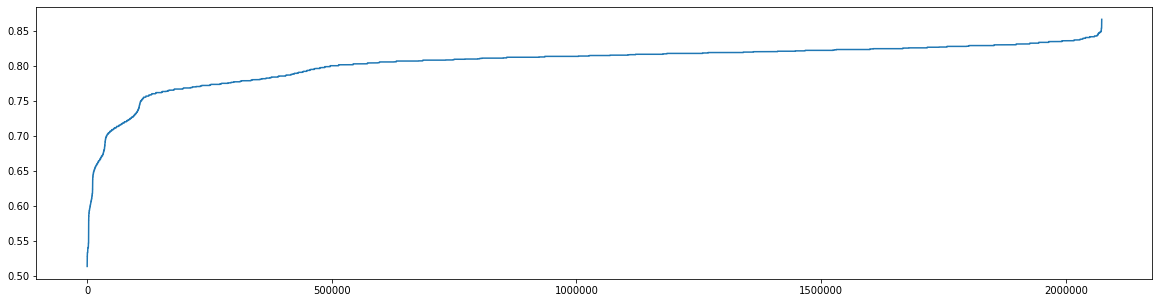

In [139]:
plt.plot(sorted(M.ravel()))
plt.show()

In [140]:
from sklearn.cluster import DBSCAN

In [141]:
dbscan = DBSCAN(eps=0.965, min_samples=5, metric='precomputed')
dbscan.fit(M)

DBSCAN(algorithm='auto', eps=0.965, leaf_size=30, metric='precomputed',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

In [142]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Approximated Clustering

In [150]:
n_paa_segments = 10
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(ts)

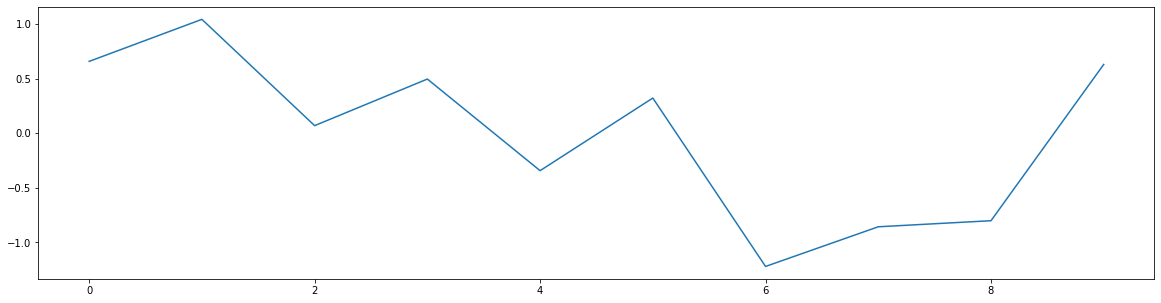

In [151]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.show()

In [152]:
km = TimeSeriesKMeans(n_clusters=3, metric="euclidean", max_iter=5, random_state=0)
km.fit(X_paa)

TimeSeriesKMeans(dtw_inertia=False, init='k-means++', max_iter=5,
                 max_iter_barycenter=100, metric='euclidean',
                 metric_params=None, n_clusters=3, n_init=1, n_jobs=None,
                 random_state=0, tol=1e-06, verbose=0)

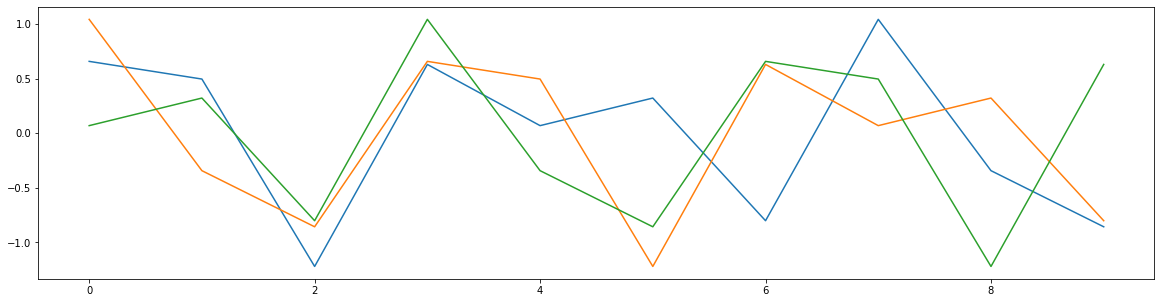

In [153]:
plt.plot(km.cluster_centers_.reshape(X_paa.shape[1], 3))
plt.show()

In [154]:
km.labels_

array([0], dtype=int64)

C:\Users\ricky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ricky\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
C:\Users\ricky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ricky\Anaconda3\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)


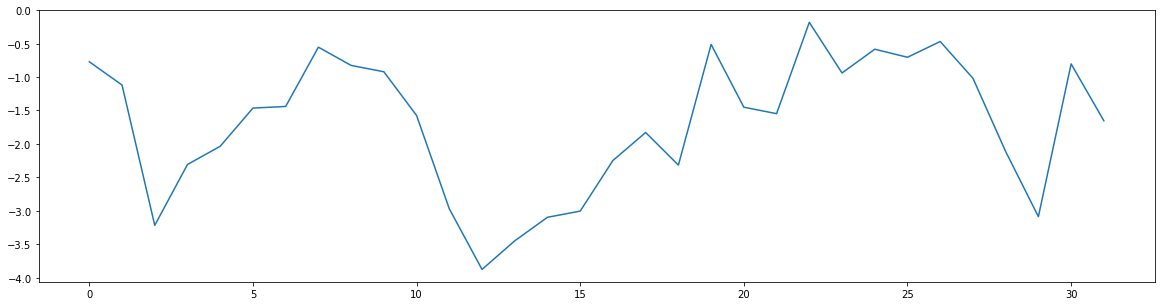

In [155]:
for i in range(3):
    plt.plot(np.mean(X[np.where(km.labels_ == i)[0]], axis=0))
plt.show()